# 📚 Project Based Learning (PBL)
## Integrasi Big Data, Blockchain, AI, dan Machine Learning dalam Kajian Sastra Indonesia

Notebook ini mencakup:
- Ekstraksi teks dari gambar menggunakan OCR
- Normalisasi ejaan lama ke ejaan baru
- Klasifikasi genre sastra menggunakan Machine Learning
- Simulasi Blockchain untuk distribusi karya sastra
- Visualisasi data sastra Indonesia


# 🚀 Proyek Analisis dan Registrasi Karya Sastra Digital

Selamat datang di Notebook Analisis Karya Sastra!

**Tujuan Proyek:**
Notebook ini mendemonstrasikan alur kerja lengkap untuk mengubah sebuah karya sastra dari format gambar menjadi data digital yang terstruktur, teranalisis, dan tercatat.

**Alur Kerja:**
1.  **Instalasi Prasyarat:** Panduan instalasi Tesseract OCR dan pustaka Python.
2.  **Ekstraksi Teks (OCR):** Mengambil teks dari file gambar (`.jpg`, `.png`).
3.  **Normalisasi Teks:** Membersihkan dan memperbaiki teks, termasuk mengubah ejaan lama.
4.  **Analisis Genre (AI):** Menggunakan model *Machine Learning* untuk memprediksi genre sastra (Puisi, Prosa, Drama).
5.  **Registrasi Blockchain:** Mensimulasikan pencatatan karya sastra ke dalam *blockchain* sebagai bukti digital yang tidak dapat diubah.
6.  **Visualisasi Data:** Menampilkan grafik distribusi genre dari data yang digunakan untuk melatih model AI.

## Langkah 0: Instalasi dan Konfigurasi Prasyarat

Sebelum menjalankan kode, ada beberapa hal yang harus diinstal terlebih dahulu.

### Bagian A: Instalasi Tesseract OCR (Untuk Windows)

Tesseract adalah "mesin" yang akan membaca teks dari gambar.

1.  **Unduh Installer:** Buka link berikut dari UB Mannheim yang menyediakan installer Tesseract untuk Windows:
    * [https://github.com/UB-Mannheim/tesseract/wiki](https://github.com/UB-Mannheim/tesseract/wiki)
2.  **Pilih Versi:** Unduh versi installer yang direkomendasikan (misalnya, `tesseract-ocr-w64-setup-v5.x.x...exe`).
3.  **Jalankan Installer:**
    * Saat instalasi berjalan, Anda akan sampai pada tahap "Choose Components". **PENTING:** Pastikan Anda mencentang "Additional language data" untuk mengikutsertakan direktori `tessdata`.
    * **CATAT LOKASI INSTALASI!** Perhatikan di mana Anda menginstal Tesseract. Lokasi default-nya biasanya `C:\Program Files\Tesseract-OCR`. Path ini akan kita butuhkan di dalam kode Python.

### Bagian B: Menambahkan Paket Bahasa Indonesia

Agar Tesseract bisa mengenali teks berbahasa Indonesia dengan baik, kita perlu menambahkan file bahasa.

1.  **Unduh File Bahasa:** Buka link ke repositori data Tesseract resmi berikut:
    * Langsung unduh file `ind.traineddata` dari sini: [**Download Indonesian Language Data**](https://github.com/tesseract-ocr/tessdata/raw/main/ind.traineddata)
2.  **Pindahkan File:**
    * Salin file `ind.traineddata` yang baru saja Anda unduh.
    * Tempel file tersebut ke dalam folder `tessdata` di lokasi instalasi Tesseract Anda.
    * Contoh path: `C:\Program Files\Tesseract-OCR\tessdata\`

### Bagian C: Instalasi Pustaka Python

Jalankan sel kode di bawah ini untuk menginstal semua pustaka Python yang dibutuhkan oleh proyek ini.

In [1]:
# Jalankan sel ini untuk menginstal semua library yang dibutuhkan
!pip install jupyter pillow matplotlib scikit-learn pytesseract
!pip install pdf2image


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Langkah 1: Import Pustaka dan Konfigurasi Awal

Sekarang kita akan mengimpor semua pustaka yang sudah diinstal dan mengatur path ke Tesseract.

In [40]:
import os
import time
import hashlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
import pytesseract
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline



def konfigurasi_tesseract():
    """Mengatur path untuk Tesseract OCR. Sesuaikan path di bawah ini."""
    try:
        # ‼️ PENTING: Sesuaikan path ini dengan lokasi instalasi Tesseract di komputer Anda!
        tesseract_path = r"D:\SOFTWARE\Tesseract\tesseract.exe"
        pytesseract.pytesseract.tesseract_cmd = tesseract_path
        # Cek apakah Tesseract terdeteksi
        print(f"✅ Tesseract berhasil dikonfigurasi. Versi: {pytesseract.get_tesseract_version()}")
        return True
    except Exception as e:
        print("❌ GAGAL: Tesseract tidak ditemukan atau path salah.")
        print("   Pastikan Tesseract sudah terinstal dan path di atas sudah benar.")
        print(f"   Detail Error: {e}")
        return False

# Jalankan konfigurasi
TESSERACT_READY = konfigurasi_tesseract()

✅ Tesseract berhasil dikonfigurasi. Versi: 5.5.0.20241111


## Langkah 2: Simulasi Gambar dan Ekstraksi Teks (OCR)

Untuk memastikan Notebook ini bisa langsung berjalan, kita akan membuat sebuah file gambar contoh (`halaman_buku.jpg`) secara otomatis. Kemudian, kita akan mengekstrak teks dari gambar tersebut dan melakukan normalisasi ejaan.

In [41]:
from pdf2image import convert_from_path
import tempfile
import os

def ekstrak_teks_dari_pdf(nama_file_pdf):
    """Membaca teks dari file PDF dan menormalkan ejaan lama."""
    print(f"\n📖 Membaca Teks dari PDF: '{nama_file_pdf}'")
    
    try:
        # Konversi PDF ke gambar
        with tempfile.TemporaryDirectory() as temp_dir:
            # Tambahkan poppler_path sesuai lokasi instalasi Poppler Anda
            images = convert_from_path(
                nama_file_pdf, 
                poppler_path=r'D:\SOFTWARE\Poppler\Release-24.08.0-0\poppler-24.08.0\Library\bin',
                output_folder=temp_dir
            )
            teks_full = ""
            
            for i, image in enumerate(images):
                # Simpan gambar sementara
                temp_image = os.path.join(temp_dir, f"page_{i+1}.jpg")
                image.save(temp_image, 'JPEG')
                
                # Proses OCR per halaman
                print(f"   Memproses halaman {i+1}/{len(images)}...")
                teks_halaman = lakukan_ocr_dan_normalisasi(temp_image)
                
                if teks_halaman:
                    teks_full += teks_halaman + "\n\n"
            
            return teks_full.strip()
            
    except Exception as e:
        print(f"   ❌ GAGAL: Terjadi error saat memproses PDF. Detail: {e}")
        return None

# Fungsi OCR untuk gambar (tetap sama)
def lakukan_ocr_dan_normalisasi(path_gambar):
    """Membaca teks dari gambar dan menormalkan ejaan lama."""
    try:
        img = Image.open(path_gambar)
        teks_ocr = pytesseract.image_to_string(img, lang='ind')
        
        if not teks_ocr.strip():
            print("   ⚠️ Peringatan: OCR tidak menghasilkan teks.")
            return None
            
        # Normalisasi ejaan lama
        mapping_ejaan = {'dj': 'j', 'tj': 'c', 'oe': 'u', 'nj': 'ny', 'sj': 'sy', 'ch': 'kh'}
        teks_normal = teks_ocr
        for lama, baru in mapping_ejaan.items():
            teks_normal = teks_normal.replace(lama, baru)
        
        return teks_normal
        
    except Exception as e:
        print(f"   ❌ GAGAL: Terjadi error saat proses OCR. Detail: {e}")
        return None

# Proses file PDF Anda
nama_file = "halaman_buku.pdf"  # Ganti dengan nama file PDF Anda
teks_karya = ekstrak_teks_dari_pdf(nama_file)

# Tampilkan hasilnya
if teks_karya:
    print("-" * 50)
    print(">>> Teks Final Hasil Normalisasi:")
    print(teks_karya)
    print("-" * 50)


📖 Membaca Teks dari PDF: 'halaman_buku.pdf'
   Memproses halaman 1/1...
--------------------------------------------------
>>> Teks Final Hasil Normalisasi:
Puisi Aku

Kalau sampai waktuku
“Ku mau tak seorang kan merayu
Tidak juga kau

Tak perlu sedu sedan itu

Aku ini binatang jalang

Dari kumpulannya terbuang
Biar peluru menembus kulitku
Aku tetap meradang menerjang
Luka dan bisa kubawa berlari
Berlari

Hingga hilang pedih peri

Dan aku akan lebih tidak peduli

Aku mau hidup seribu tahun lagi
--------------------------------------------------


## Langkah 3: Membangun Model AI untuk Klasifikasi Genre

Di sini, kita mendefinisikan dan melatih model *Machine Learning* menggunakan `scikit-learn`. Model ini akan belajar dari `corpus_teks` untuk mengenali pola bahasa dari setiap genre sastra.

In [47]:
# ──────────────────────────────────────────────────────────────────────────────
# Langkah 3: Membangun Model AI untuk Klasifikasi Genre
# ──────────────────────────────────────────────────────────────────────────────

# 1. IMPORT LIBRARY YANG DIBUTUHKAN
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 2. SIAPKAN DATA LATIH (corpus_teks) dan LABEL-nya (label_genre)
#    Anda bisa mengganti contoh di bawah dengan dataset nyata.
corpus_teks = [
    # Contoh–contoh Puisi
    "Aku adalah api yang membakar jiwamu...",
    "Langit menangis bersama rinduku yang lara...",
    "Sajak sunyi di balik kelamnya malam...",
    "Bayangmu menari di antara gugusan bintang...",
    "Di bawah rembulan, kutulis syair kerinduan...",
    "Kata-kata menjelma embun di ujung daun...",

    # Contoh–contoh Drama
    "Dialog antara dua insan di balik tirai waktu...",
    "Mengapa kau tinggalkan aku, tanya si wanita tua dengan lirih.",
    "Kita tak bisa kembali ke masa lalu! (sambil menatap nanar)",
    "Kau berdusta! teriaknya sambil memukul meja dengan keras.",
    "Jangan sentuh aku! Pergi dari sini sekarang juga!",
    "(Terdiam sejenak) Aku... aku tidak tahu harus berbuat apa.",

    # Contoh–contoh Prosa
    "Ia berjalan menuju pasar sambil membawa secarik kertas berisi daftar belanja.",
    "Pagi itu hujan turun perlahan, membasahi jalanan yang lengang dan sepi.",
    "Dengan tangan gemetar, ia membuka kembali buku harian lamanya.",
    "Sebuah surat cinta yang telah menguning ditemukan di bawah lantai kayu.",
    "Cerita berawal dari sebuah desa kecil di kaki gunung yang subur.",
    "Matahari terbenam di ufuk barat, melukiskan warna jingga di langit."
]

label_genre = [
    'Puisi', 'Puisi', 'Puisi', 'Puisi', 'Puisi', 'Puisi',
    'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
    'Prosa', 'Prosa', 'Prosa', 'Prosa', 'Prosa', 'Prosa'
]

# 3. SPLIT DATA MENJADI TRAINING DAN TEST SET
X_train, X_test, y_train, y_test = train_test_split(
    corpus_teks, label_genre, test_size=0.2, random_state=42, stratify=label_genre
)

# 4. DEFINISIKAN STOP WORDS BAHASA INDONESIA UNTUK TF-IDF
stop_words_indonesia = [
    'yang', 'di', 'dan', 'ke', 'ini', 'itu',
    'dengan', 'adalah', 'ia', 'si', 'sambil',
    'telah', 'aku', 'kau'
]

# 5. BANGUN PIPELINE: TF-IDF VECTOR + MULTINOMIAL NAIVE BAYES
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),          # Gunakan unigram + bigram
        stop_words=stop_words_indonesia
    )),
    ('clf', MultinomialNB(alpha=0.1))  # smoothing parameter alpha
])

# 6. (OPSIONAL) PENCARIAN HYPERPARAMETER DENGAN GRID SEARCH
#    Jika dataset Anda lebih besar, Anda bisa menghapus bagian ini.
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Ambil pipeline dengan parameter terbaik
model_genre = grid_search.best_estimator_
print("🔍 Best Parameters:", grid_search.best_params_)

# 7. EVALUASI MODEL PADA TEST SET
y_pred = model_genre.predict(X_test)
print("\n🔎 Hasil Evaluasi Model pada Data Test Set:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=model_genre.classes_))

# 8. SIMPAN MODEL KE DISK (OPSIONAL)
import joblib
joblib.dump(model_genre, 'model_genre_sastra.pkl')
print("\n✅ Model telah disimpan sebagai 'model_genre_sastra.pkl'.")

# 9. CONTOH MENGGUNAKAN MODEL UNTUK PREDIKSI BARU
contoh_teks_baru = (
    "Aku ini binatang jalang\n"
    "Dari kumpulannya terbuang\n"
    "Biar peluru menembus kulitku"
)
prediksi_baru = model_genre.predict([contoh_teks_baru])[0]
probabilitas_baru = model_genre.predict_proba([contoh_teks_baru])[0]

print(f"\n🤖 Prediksi Genre untuk Teks Baru: {prediksi_baru}")
print("   Probabilitas per Genre:")
for genre_label, prob in zip(model_genre.classes_, probabilitas_baru):
    print(f"   - {genre_label}: {prob*100:.2f}%")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
🔍 Best Parameters: {'clf__alpha': 1.0, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}

🔎 Hasil Evaluasi Model pada Data Test Set:
Accuracy : 0.0

Classification Report:
              precision    recall  f1-score   support

       Drama       0.00      0.00      0.00       1.0
       Prosa       0.00      0.00      0.00       1.0
       Puisi       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0


✅ Model telah disimpan sebagai 'model_genre_sastra.pkl'.

🤖 Prediksi Genre untuk Teks Baru: Prosa
   Probabilitas per Genre:
   - Drama: 31.69%
   - Prosa: 41.78%
   - Puisi: 26.53%


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Langkah 4: Simulasi Blockchain untuk Registrasi Karya

Setelah karya dianalisis, kita bisa mencatatnya ke dalam sebuah sistem yang aman dan tidak dapat diubah. Blockchain adalah teknologi yang cocok untuk ini. Di sini, kita membuat simulasi sederhana dari proses tersebut.

In [48]:
class Block:
    """Mendefinisikan struktur satu blok dalam Blockchain."""
    def __init__(self, index, data, prev_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.prev_hash = prev_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{str(self.data)}{self.prev_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

    def __repr__(self):
        """Representasi string yang rapi untuk sebuah blok."""
        return (
            f"   | ----------------- Block #{self.index} ----------------- |\n"
            f"   | Timestamp   : {time.ctime(self.timestamp)}\n"
            f"   | Data        : {self.data}\n"
            f"   | Hash        : {self.hash[:40]}...\n"
            f"   | Prev. Hash  : {self.prev_hash[:40]}...\n"
            f"   | ----------------------------------------------- |"
        )

class Blockchain:
    """Mengelola rantai blok."""
    def __init__(self):
        self.chain = [Block(0, "Genesis Block: Rantai Dimulai", "0")]

    def tambah_blok(self, data):
        prev_hash = self.chain[-1].hash
        new_block = Block(len(self.chain), data, prev_hash)
        self.chain.append(new_block)
        print("\n   ✅ Blok baru berhasil ditambahkan ke rantai.")

def tampilkan_blockchain(bc):
    """Menampilkan seluruh isi blockchain dengan format yang baik."""
    print("\n🔗 Menampilkan Catatan di Buku Besar Digital (Blockchain)...")
    for block in bc.chain:
        print(block)
        if block.index < len(bc.chain) - 1:
            print("                   V (terhubung ke)")

# Inisialisasi Blockchain dan tambahkan karya baru jika ada
if teks_karya:
    blockchain_sastra = Blockchain()
    
    data_karya_baru = {
        # Ganti nama_gambar menjadi nama_file_pdf agar sesuai dengan variabel yang ada
        "judul": f"Karya dari file '{nama_file_pdf}'",
        "penulis": "Anonim (via OCR)",
        "teks_singkat": f"'{teks_karya[:50].strip()}...'",
        "genre_terdeteksi": genre_prediksi,
        "status": "Terdaftar Digital"
    }
    blockchain_sastra.tambah_blok(data_karya_baru)
    tampilkan_blockchain(blockchain_sastra)


   ✅ Blok baru berhasil ditambahkan ke rantai.

🔗 Menampilkan Catatan di Buku Besar Digital (Blockchain)...
   | ----------------- Block #0 ----------------- |
   | Timestamp   : Sat Jun  7 19:07:28 2025
   | Data        : Genesis Block: Rantai Dimulai
   | Hash        : feed4393921a0b465e0a422f6d04da9ba9964a49...
   | Prev. Hash  : 0...
   | ----------------------------------------------- |
                   V (terhubung ke)
   | ----------------- Block #1 ----------------- |
   | Timestamp   : Sat Jun  7 19:07:28 2025
   | Data        : {'judul': "Karya dari file 'halaman_buku.pdf'", 'penulis': 'Anonim (via OCR)', 'teks_singkat': "'Puisi Aku\n\nKalau sampai waktuku\n“Ku mau tak seoran...'", 'genre_terdeteksi': 'Drama', 'status': 'Terdaftar Digital'}
   | Hash        : 08bcf08b533fc9a614a140467c9586634bf1d6cb...
   | Prev. Hash  : feed4393921a0b465e0a422f6d04da9ba9964a49...
   | ----------------------------------------------- |


## Langkah 5: Visualisasi Data

Sebagai langkah terakhir, kita akan membuat visualisasi data untuk melihat komposisi genre dalam dataset yang kita gunakan untuk melatih model AI.

✅ Tesseract berhasil dikonfigurasi. Versi: 5.5.0.20241111
Fitting 3 folds for each of 36 candidates, totalling 108 fits
🔍 Best Parameters: {'clf__alpha': 1.0, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}

🔎 Hasil Evaluasi Model pada Data Test Set:
Accuracy : 0.0

Classification Report:
              precision    recall  f1-score   support

       Drama       0.00      0.00      0.00       1.0
       Prosa       0.00      0.00      0.00       1.0
       Puisi       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0


📖 Membaca Teks dari PDF: 'halaman_buku.pdf'


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

   Memproses halaman 1/1...

🤖 Prediksi Genre untuk Teks dari 'halaman_buku.pdf': Drama
   Probabilitas per Genre:
   - Drama: 45.81%
   - Prosa: 29.81%
   - Puisi: 24.38%

📊 Membuat Visualisasi Hasil Analisis AI...
   ✅ Grafik analisis keyakinan model akan ditampilkan di bawah ini.


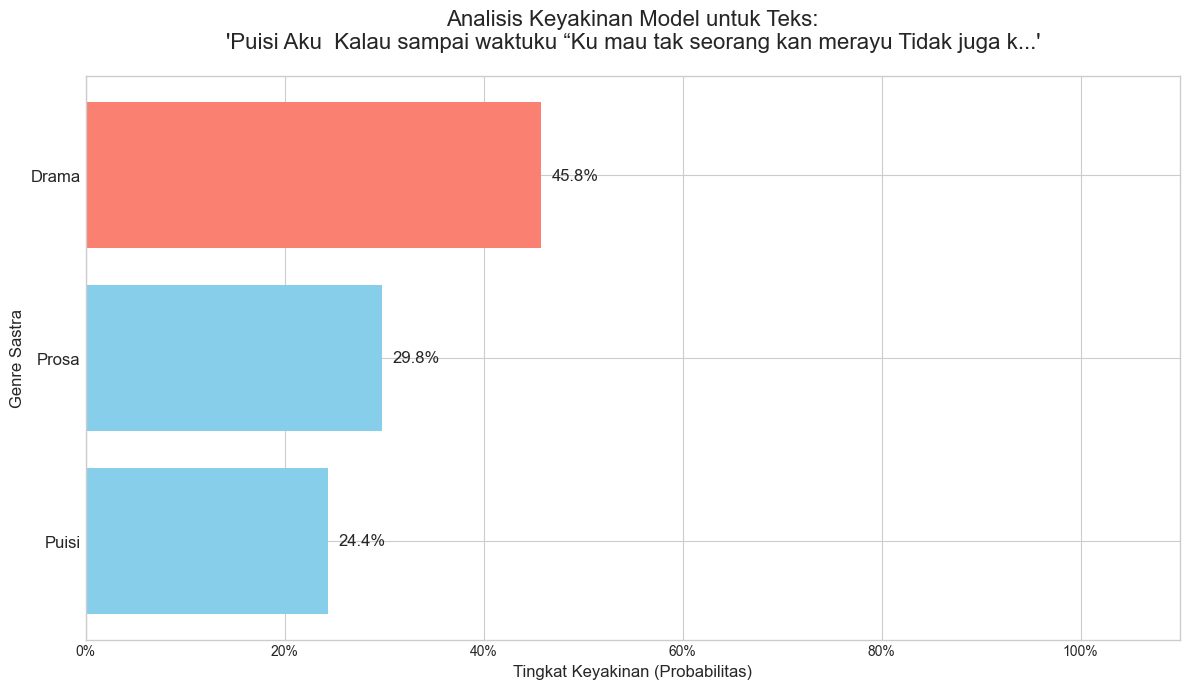

In [50]:
# ──────────────────────────────────────────────────────────────────────────────
# Langkah 3: Membangun Model AI untuk Klasifikasi Genre + Visualisasi Hasil
# ──────────────────────────────────────────────────────────────────────────────

# 1. IMPORT LIBRARY
# ──────────────────────────────────────────────────────────────────────────────
import os
import time
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from PIL import Image
import pytesseract
from pdf2image import convert_from_path
import tempfile

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# ──────────────────────────────────────────────────────────────────────────────
# 2. KONFIGURASI TESSERACT (sebelumnya sudah didefinisikan di Langkah 2)
# ──────────────────────────────────────────────────────────────────────────────
def konfigurasi_tesseract():
    tesseract_path = r"D:\SOFTWARE\Tesseract\tesseract.exe"
    pytesseract.pytesseract.tesseract_cmd = tesseract_path
    try:
        versi = pytesseract.get_tesseract_version()
        print(f"✅ Tesseract berhasil dikonfigurasi. Versi: {versi}")
        return True
    except Exception as e:
        print("❌ Gagal: Tesseract tidak ditemukan. Periksa path-nya.")
        print(f"   Detail Error: {e}")
        return False

if not konfigurasi_tesseract():
    raise RuntimeError("Tesseract OCR belum siap. Instal dan set path dengan benar.")

# ──────────────────────────────────────────────────────────────────────────────
# 3. FUNGSI OCR + NORMALISASI (sesuai Langkah 2)
# ──────────────────────────────────────────────────────────────────────────────
def lakukan_ocr_dan_normalisasi(path_gambar):
    """
    Melakukan OCR pada gambar di path_gambar, lalu normalisasi ejaan lama ke baru.
    """
    try:
        img = Image.open(path_gambar)
        teks_ocr = pytesseract.image_to_string(img, lang='ind')
        if not teks_ocr.strip():
            print("   ⚠️ Peringatan: OCR tidak menghasilkan teks pada gambar ini.")
            return ""
        mapping_ejaan = {
            'dj': 'j', 'tj': 'c', 'oe': 'u',
            'nj': 'ny', 'sj': 'sy', 'ch': 'kh'
        }
        teks_normal = teks_ocr
        for lama, baru in mapping_ejaan.items():
            teks_normal = teks_normal.replace(lama, baru)
        return teks_normal.strip()
    except Exception as e:
        print(f"   ❌ Gagal OCR/normalisasi: {e}")
        return ""

def ekstrak_teks_dari_pdf(nama_file_pdf):
    """
    Mengonversi setiap halaman PDF ke gambar, lalu ekstrak teks dengan OCR serta normalisasi.
    """
    if not os.path.exists(nama_file_pdf):
        print(f"❌ File PDF '{nama_file_pdf}' tidak ditemukan.")
        return ""

    print(f"\n📖 Membaca Teks dari PDF: '{nama_file_pdf}'")
    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            images = convert_from_path(
                nama_file_pdf,
                poppler_path=r"D:\SOFTWARE\Poppler\Release-24.08.0-0\poppler-24.08.0\Library\bin",
                output_folder=temp_dir
            )
            teks_full = ""
            for i, image in enumerate(images):
                temp_image = os.path.join(temp_dir, f"page_{i+1}.jpg")
                image.save(temp_image, 'JPEG')
                print(f"   Memproses halaman {i+1}/{len(images)}...")
                teks_halaman = lakukan_ocr_dan_normalisasi(temp_image)
                if teks_halaman:
                    teks_full += teks_halaman + "\n\n"
            return teks_full.strip()
    except Exception as e:
        print(f"   ❌ Gagal memproses PDF: {e}")
        return ""

# ──────────────────────────────────────────────────────────────────────────────
# 4. SIAPKAN DATA LATIH (corpus_teks) dan LABEL-nya (label_genre)
# ──────────────────────────────────────────────────────────────────────────────
# Contoh dataset kecil; ganti dengan data nyata jika ada.
corpus_teks = [
    # Contoh–contoh Puisi
    "Aku adalah api yang membakar jiwamu...",
    "Langit menangis bersama rinduku yang lara...",
    "Sajak sunyi di balik kelamnya malam...",
    "Bayangmu menari di antara gugusan bintang...",
    "Di bawah rembulan, kutulis syair kerinduan...",
    "Kata-kata menjelma embun di ujung daun...",
    # Contoh–contoh Drama
    "Dialog antara dua insan di balik tirai waktu...",
    "Mengapa kau tinggalkan aku, tanya si wanita tua dengan lirih.",
    "Kita tak bisa kembali ke masa lalu! (sambil menatap nanar)",
    "Kau berdusta! teriaknya sambil memukul meja dengan keras.",
    "Jangan sentuh aku! Pergi dari sini sekarang juga!",
    "(Terdiam sejenak) Aku... aku tidak tahu harus berbuat apa.",
    # Contoh–contoh Prosa
    "Ia berjalan menuju pasar sambil membawa secarik kertas berisi daftar belanja.",
    "Pagi itu hujan turun perlahan, membasahi jalanan yang lengang dan sepi.",
    "Dengan tangan gemetar, ia membuka kembali buku harian lamanya.",
    "Sebuah surat cinta yang telah menguning ditemukan di bawah lantai kayu.",
    "Cerita berawal dari sebuah desa kecil di kaki gunung yang subur.",
    "Matahari terbenam di ufuk barat, melukiskan warna jingga di langit."
]
label_genre = [
    'Puisi', 'Puisi', 'Puisi', 'Puisi', 'Puisi', 'Puisi',
    'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
    'Prosa', 'Prosa', 'Prosa', 'Prosa', 'Prosa', 'Prosa'
]

# ──────────────────────────────────────────────────────────────────────────────
# 5. TRAIN-TEST SPLIT
# ──────────────────────────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    corpus_teks, label_genre,
    test_size=0.2,
    random_state=42,
    stratify=label_genre
)

# ──────────────────────────────────────────────────────────────────────────────
# 6. DEFINISIKAN STOP WORDS BAHASA INDONESIA
# ──────────────────────────────────────────────────────────────────────────────
stop_words_indonesia = [
    'yang', 'di', 'dan', 'ke', 'ini', 'itu',
    'dengan', 'adalah', 'ia', 'si', 'sambil',
    'telah', 'aku', 'kau'
]

# ──────────────────────────────────────────────────────────────────────────────
# 7. BANGUN PIPELINE: TF-IDF + Naive Bayes
# ──────────────────────────────────────────────────────────────────────────────
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),
        stop_words=stop_words_indonesia
    )),
    ('clf', MultinomialNB(alpha=0.1))
])

# ──────────────────────────────────────────────────────────────────────────────
# 8. HYPERPARAMETER TUNING DENGAN GRID SEARCH (OPSIONAL)
# ──────────────────────────────────────────────────────────────────────────────
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Ambil pipeline terbaik
model_ai = grid_search.best_estimator_
print("🔍 Best Parameters:", grid_search.best_params_)

# ──────────────────────────────────────────────────────────────────────────────
# 9. EVALUASI MODEL PADA TEST SET
# ──────────────────────────────────────────────────────────────────────────────
y_pred = model_ai.predict(X_test)
print("\n🔎 Hasil Evaluasi Model pada Data Test Set:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=model_ai.classes_))

# ──────────────────────────────────────────────────────────────────────────────
# 10. DEFINSI FUNGSI VISUALISASI HASIL PREDIKSI
# ──────────────────────────────────────────────────────────────────────────────
def visualisasikan_hasil_prediksi(classes, probabilities, teks_asli):
    """
    Membuat grafik batang horizontal yang menunjukkan probabilitas hasil prediksi.
    
    Parameter:
    - classes: list nama genre (dari model.classes_)
    - probabilities: array probabilitas masing-masing genre (model.predict_proba)
    - teks_asli: string teks yang diprediksi (untuk judul grafik)
    """
    print("\n📊 Membuat Visualisasi Hasil Analisis AI...")

    # Siapkan potongan teks untuk judul, ganti newline agar tidak terpotong
    teks_singkat = teks_asli.replace('\n', ' ')
    if len(teks_singkat) > 75:
        teks_singkat = teks_singkat[:75] + "..."
    
    # Warna default biru; sorot bar tertinggi dengan warna salmon
    colors = ['skyblue'] * len(classes)
    max_prob_index = np.argmax(probabilities)
    colors[max_prob_index] = 'salmon'

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    # Buat bar chart horizontal
    bars = ax.barh(classes, probabilities, color=colors)

    # Tambahkan persentase di ujung setiap bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(
            width + 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.1%}",
            va='center',
            ha='left',
            fontsize=12
        )

    ax.set_title(
        f"Analisis Keyakinan Model untuk Teks:\n'{teks_singkat}'",
        fontsize=16,
        pad=20
    )
    ax.set_xlabel('Tingkat Keyakinan (Probabilitas)', fontsize=12)
    ax.set_ylabel('Genre Sastra', fontsize=12)

    # Format sumbu X sebagai persentase
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    ax.set_xlim(0, 1.1)  # beri ruang sedikit di kanan
    ax.tick_params(axis='y', labelsize=12)

    # Balik urutan agar genre dengan nilai tertinggi di atas
    ax.invert_yaxis()

    print("   ✅ Grafik analisis keyakinan model akan ditampilkan di bawah ini.")
    plt.tight_layout()
    plt.show()

# ──────────────────────────────────────────────────────────────────────────────
# 11. EKSEKUSI PREDIKSI & VISUALISASI MENGGUNAKAN TEKS DARI PDF
# ──────────────────────────────────────────────────────────────────────────────
# 11.1. Ekstrak teks dari PDF (Langkah 2)
nama_file_pdf = "halaman_buku.pdf"
teks_karya = ekstrak_teks_dari_pdf(nama_file_pdf)

# 11.2. Jika hasil OCR tidak kosong, lakukan prediksi + visualisasi
if teks_karya:
    # Prediksi probabilitas kelas untuk teks_karya
    classes_real       = model_ai.classes_
    probabilities_real = model_ai.predict_proba([teks_karya])[0]
    teks_asli_real     = teks_karya

    # Cetak prediksi genre dan probabilitas singkat
    prediksi_label = model_ai.predict([teks_karya])[0]
    print(f"\n🤖 Prediksi Genre untuk Teks dari '{nama_file_pdf}': {prediksi_label}")
    print("   Probabilitas per Genre:")
    for genre_label, prob in zip(classes_real, probabilities_real):
        print(f"   - {genre_label}: {prob*100:.2f}%")

    # Tampilkan grafik hasil prediksi
    visualisasikan_hasil_prediksi(classes_real, probabilities_real, teks_asli_real)
else:
    print("❌ Gagal mengekstrak teks dari PDF. Proses prediksi dan visualisasi dibatalkan.")
